# Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes. By leveraging machine learning algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease diagnosis and prognosis.

# Importing Libraries

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Building machine learning for predictive modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Loading the dataset

In [2]:
data_train = pd.read_csv('data/Train_data.csv')
data_test = pd.read_csv('d/Test_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'images/Train_data.csv'

# Data Inspection

In [ ]:
data_train.head()

# Observation
The dataset contains various health attributes such as Glucose, Cholesterol, Hemoglobin, and others, which are numerical features likely normalized between 0 and 1. The target variable is 'Disease', which indicates the type of disease an individual has or if they are healthy. The dataset includes multiple disease categories, suggesting that this is a multi-class classification problem. The first few entries show a mix of healthy individuals and those with conditions like Diabetes, Thalassemia (labeled as 'Thalasse'), and Anemia. The next steps would involve further exploratory data analysis, data preprocessing, and handling any missing or inconsistent data before proceeding to model building and evaluation.

In [ ]:
data_train.shape

In [ ]:
data_train.info()

# Observation:

There are a total of 2351 entries (rows) in the dataset.
Each column has 2351 non-null values, indicating that there are no missing values in the dataset.
Most of the columns contain numerical data (float64), representing various health attributes.
The "Disease" column is of type object, which suggests that it contains categorical data (likely the disease labels).
This summary provides important information about the structure and completeness of the dataset, which will be useful for modeling.

In [6]:
data_train.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

Before we compute any statistics on the data, lets do any necessary data conversion

## Preprocessing

In [7]:
data_train["Disease"].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [8]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [9]:
# Fit and transform the 'Disease' column
data_train['Disease'] = label_encoder.fit_transform(data_train['Disease'])

In [10]:
data_train["Disease"].value_counts()

0    623
2    556
1    540
3    509
4    123
Name: Disease, dtype: int64

In [11]:
data_train.head(10)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,2
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,3
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,0
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,3
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.389461,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,1
6,0.353734,0.757757,0.755007,0.012594,0.227684,0.425117,0.387461,0.461418,0.305588,0.741120,...,0.446854,0.729376,0.615543,0.794735,0.233890,0.612188,0.407891,0.426863,0.532100,4
7,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,4
8,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,...,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,3
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,...,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,4


# Summary Statistic

In [12]:
data_train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308,1.561463
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034,1.234412
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867,0.000000
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192,0.000000
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601,2.000000
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426,3.000000
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906,4.000000


# Observation:

Each row provides statistical information for a numerical attribute.
"count" represents the number of non-null values for each attribute.
"mean" represents the mean (average) value of each attribute.
"std" represents the standard deviation, which measures the spread or dispersion of the values around the mean.
"min" and "max" represent the minimum and maximum values of each attribute, respectively.
The "25%", "50%", and "75%" rows represent the 25th percentile (1st quartile), 50th percentile (median or 2nd quartile), and 75th percentile (3rd quartile), respectively.
This summary provides insights into the distribution and variability of the numerical attributes in the dataset, which can be helpful for understanding the data and identifying any potential outliers or patterns.

# Correlation Analysis

C:\Users\AMAECHI NGWOKE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Disease', ylabel='count'>

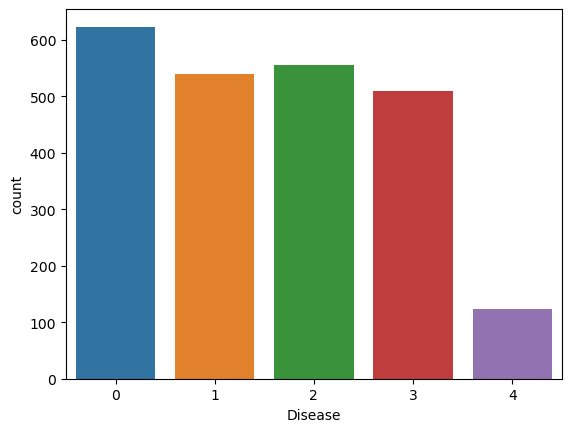

In [13]:
sns.countplot(data_train["Disease"])

# Splitting the dataset

In [14]:
# Spliting the dataset into features (X) and target variable (y)
X = data_train.drop('Disease', axis = 1)
y = data_train['Disease']

In [15]:
# Spliting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Output the shapes of the resulting dataframes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1880, 24), (471, 24), (1880,), (471,))

The dataset was successfully split into training and testing sets with an 80-20 split, resulting in 1880 samples for training and 471 samples for testing. Each sample contains 24 features, and the target variable 'Disease' has been encoded into numerical labels for both training and testing sets. There are no missing values in the dataset. The data is now prepared for model training and evaluation to predict the disease category based on the given health attributes.

# Standard Scaler

In [17]:
# Appling standard scaling to get optimized result 
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Prediction and Evaluation

### Using Logistic Regression

In [19]:
logistic_regression = LogisticRegression()

In [20]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Predictions on the testing set
y_pred = logistic_regression.predict(X_test)

In [22]:
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred)
precision_logistic = precision_score(y_test, y_pred, average='weighted')
recall_logistic = recall_score(y_test, y_pred, average='weighted')
f1_logistic = f1_score(y_test, y_pred, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
class_report_logistic = classification_report(y_test, y_pred)

In [23]:
print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1-score: {f1_logistic}")
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("Classification Report:")
print(class_report_logistic)

Logistic Regression Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



### Using Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators=200)
# Train the model
random_forest.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1_score = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

In [26]:
print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Logistic Regression Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



## Suport Victor Machine (SVM)

In [27]:
# Model Training
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
# Predictions on the testing set
y_pred = svm_classifier.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

